In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [2]:
def save_pkl(data, filename, local=False):
    """ Save data to file """
    # create path
    parent_dir = os.path.dirname(filename)
    if not os.path.exists(parent_dir):
        os.makedirs(parent_dir)

    # save file
    output = open(filename, 'wb')
    pickle.dump(data, output, pickle.HIGHEST_PROTOCOL)
    output.close()


def load_pkl(filename, local=False):
    """ Load data to pickle """
    input = open(filename, 'rb')
    data = pickle.load(input)
    input.close()
    return data

In [3]:
# Data file
raw_data_path = '../../data/raw data/text8'
context_to_dict_path = '../../data/text8_ng2/dict/cont_to_int.dict'
output_path = '../../data/text8_ng2/contexts/distribution_from_raw.pkl'

In [4]:
# Load data
with open(raw_data_path, encoding='utf-8') as f:
    words = f.read().split()
    
# Load dict
context_to_dict = load_pkl(context_to_dict_path, local=True)

# Convert vocab to int
context = []
for word in words:
    if word in context_to_dict:
        context.append(context_to_dict[word])

In [5]:
context_counts = Counter(context)
n_context = len(context_to_dict)
n_data = sum(list(context_counts.values()))

context_distribution = np.zeros(n_context)
for c, count in context_counts.items():
    context_distribution[c] = count / n_data
    
context_distribution = np.array(context_distribution)

In [6]:
int_to_cont = load_pkl('../../data/text8_ng/dict/int_to_cont.dict', local=True)

In [7]:
save_pkl(context_distribution, output_path)

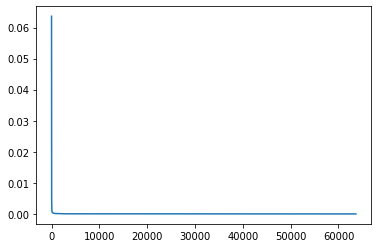

In [8]:
sorted(context_distribution)
plt.plot(context_distribution)
plt.show()

In [9]:
context_distribution[:100]

array([0.06363057, 0.03559087, 0.02497686, 0.0246852 , 0.02231341,
       0.01953605, 0.0189667 , 0.01588522, 0.01501325, 0.01154899,
       0.01098   , 0.00790229, 0.00751082, 0.00710076, 0.00699675,
       0.00694154, 0.00688075, 0.00676277, 0.00670426, 0.00656511,
       0.0064855 , 0.00612358, 0.00597598, 0.00573139, 0.00547043,
       0.00458778, 0.00439636, 0.00436861, 0.00413324, 0.00375304,
       0.0037124 , 0.00367379, 0.00352697, 0.00328453, 0.00327182,
       0.0032117 , 0.00265926, 0.00263977, 0.00238073, 0.0023432 ,
       0.00227006, 0.00211971, 0.00194435, 0.0018898 , 0.00177254,
       0.00172716, 0.00171175, 0.00168825, 0.00168459, 0.00157243,
       0.00157207, 0.0015325 , 0.00152986, 0.00152171, 0.00146356,
       0.00144455, 0.00143862, 0.00142501, 0.00136308, 0.00136128,
       0.00126644, 0.00123635, 0.00122801, 0.00122759, 0.0012237 ,
       0.00119084, 0.0011668 , 0.0011514 , 0.00114594, 0.00112748,
       0.00107604, 0.00105398, 0.00105008, 0.00104175, 0.00103